# Exploratory data analysis on metadata

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
corpus = pd.read_csv('finalcorpus.tsv', sep = '\t', low_memory = False)

In [5]:
usset = corpus.loc[(corpus.pubdate_known == True) & (~pd.isnull(corpus.birthyear)) & (corpus.firstpub >= 1890) & (corpus.firstpub <= 1989) & (corpus.us_national == True), : ]
usset.shape

(5572, 23)

In [6]:
semset = corpus.loc[(corpus.pubdate_known == True) & (~pd.isnull(corpus.birthyear)) & 
                    (corpus.firstpub >= 1880) & (corpus.firstpub <= 1999) & (corpus.authof3ormore == True), : ]
semset.shape

(10355, 23)

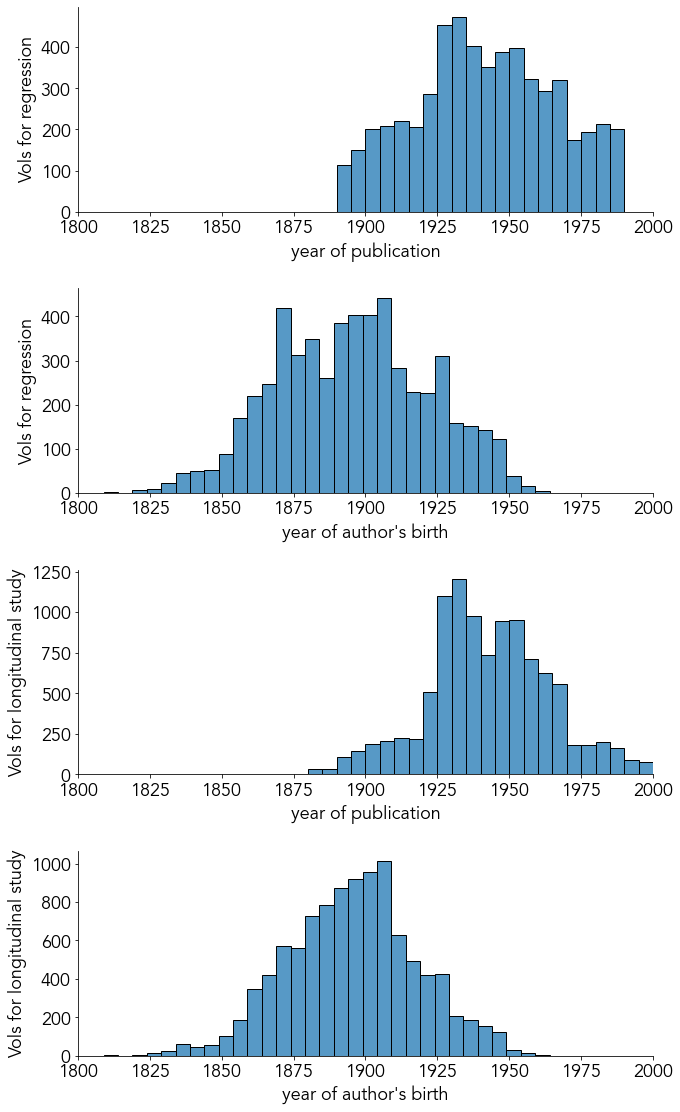

In [23]:
figure, axes = plt.subplots(4, 1, figsize=(10, 16))

sns.histplot(ax = axes[0], data = usset, x = 'firstpub', binwidth = 5)
sns.histplot(ax = axes[1], data = usset, x = 'birthyear', binwidth = 5)
sns.histplot(ax = axes[2], data = semset, x = 'firstpub', binwidth = 5)
sns.histplot(ax = axes[3], data = semset, x = 'birthyear', binwidth = 5)

axes[0].set_ylabel('Vols for regression')
axes[1].set_ylabel('Vols for regression')
axes[2].set_ylabel('Vols for longitudinal study')
axes[3].set_ylabel('Vols for longitudinal study')

axes[0].set_xlabel('year of publication')
axes[1].set_xlabel("year of author's birth")
axes[2].set_xlabel('year of publication')
axes[3].set_xlabel("year of author's birth")

axes[0].set_xlim(1800, 2000)
axes[1].set_xlim(1800, 2000)
axes[2].set_xlim(1800, 2000)
axes[3].set_xlim(1800, 2000)

sns.despine()
figure.tight_layout(pad = 1.5)
plt.rcParams.update({'font.sans-serif':'Avenir'})
plt.rcParams.update({'font.size': 16})
plt.gcf().set_facecolor('white')

plt.savefig('/Users/tunder/Dropbox/python/cohort/figures/S1distribution.png', bbox_inches = 'tight', dpi = 300)
plt.show()

In [29]:
authcount = 0
tripletcount = 0

for author, subframe in semset.groupby('hathi_author'):
    # subframe = subframe.drop_duplicates(subset = 'firstpub', keep = 'first')
    if len(subframe) > 2:
        authcount += 1
        tripletcount += len(subframe) - 2   # 1 triplet for 3 works, 2 for 4, etc

print(str(authcount) + ' authors.')
print(str(tripletcount) + ' triplets.')


1714 authors.
6927 triplets.


I did that above with a subset of the overall corpus, selected to winnow out unconfirmed publication dates. But I get the same result if I use ```bookleveltopicdata``` directly.

In [28]:
booklevel = pd.read_csv('../topicdata/bookleveltopicdata.tsv', sep = '\t', low_memory = False)

In [30]:
authcount = 0
tripletcount = 0

for author, subframe in booklevel.groupby('hathi_author'):
    # subframe = subframe.drop_duplicates(subset = 'firstpub', keep = 'first')
    if len(subframe) > 2:
        authcount += 1
        tripletcount += len(subframe) - 2   # 1 triplet for 3 works, 2 for 4, etc

print(str(authcount) + ' authors.')
print(str(tripletcount) + ' triplets.')

1714 authors.
6927 triplets.
